--------------------------------------------------------------------------------------------------------
Calculating steps
--------------------------------------------------------------------------------------------------------
Low Traffic Degree: 0.0, Medium Traffic Degree: 0.0, High Traffic Degree: 1.0

The complete traffic degree is: 1.0
--------------------------------------------------------------------------------------------------------
Good Weather Degree: 0, Fair Weather Degree: 0.0, Bad Weather Degree: 1.0

The complete weather degree is: 1.0
--------------------------------------------------------------------------------------------------------
There is a Icy road and Road Condition Degree: 0.9924182497528321
There is a residential road and Road Type Degree: 0.9371665453507294
There is a High accident history and Accident History Degree: 0.9695711736432429
The complete weather degree is: 0.9017605124354396
---------------------------------------------------------------------

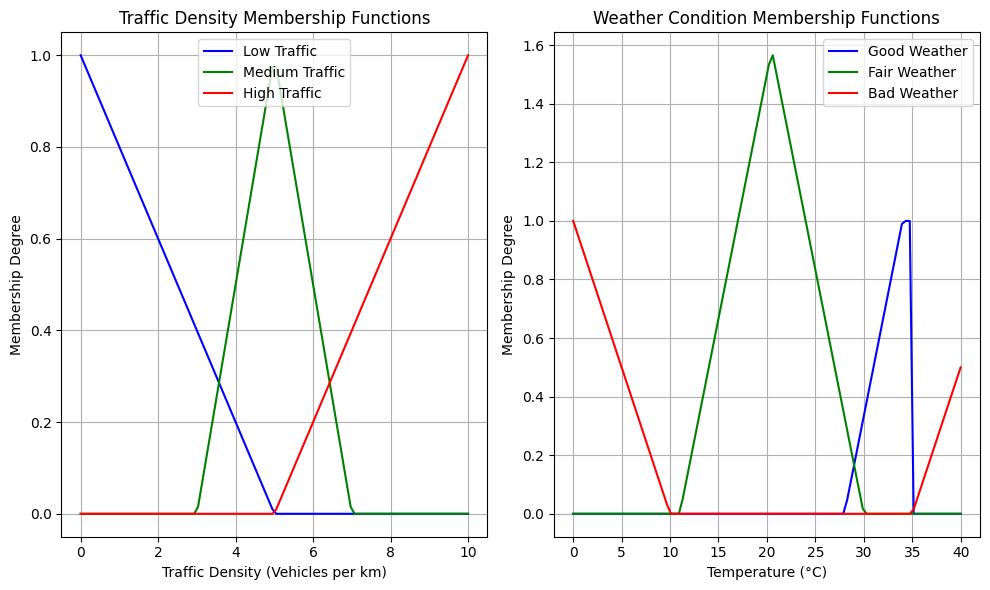

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Membership functions for Traffic Density, Weather Condition, and Collision Risk
def low_traffic_membership(density):
    """Membership function for 'Low' traffic density."""
    # The traffic is considered "Low" if the density is between 0 and 5
    # For densities above 5, the membership is 0.
    return np.maximum(0, np.minimum(1, (5 - density) / 5))  # Triangle with peak at 0

def medium_traffic_membership(density):
    """Membership function for 'Medium' traffic density."""
    # The traffic is considered "Medium" if the density is between 3 and 7
    # The membership increases from density = 3 to density = 5 and decreases from density = 5 to density = 7
    return np.maximum(0, np.minimum((density - 3) / 2, (7 - density) / 2))  # Trapezoidal shape

def high_traffic_membership(density):
    """Membership function for 'High' traffic density."""
    # The traffic is considered "High" if the density is above 5, with a peak at density = 10
    # The membership increases from density = 5 to density = 10 and remains 1 beyond density = 10
    return np.maximum(0, np.minimum(1, (density - 5) / 5))  # Triangle with peak at 10

def good_weather_membership(weather):
    """Membership function for 'Good' weather condition."""
    if weather >= 35:
        return 0  # No good weather above 35°C
    return np.maximum(0, np.minimum(1, (weather - 28) / 6))  # Triangle with peak at 35°C

def fair_weather_membership(weather):
    """Membership function for 'Fair' weather condition."""
    # Fair weather is between 26°C to 35°C (trapezoidal shape)
    return np.maximum(0, np.minimum((weather - 11) / 6, (30 - weather) / 6)) # Trapezoidal shape

def bad_weather_membership(weather):
    """Membership function for 'Bad' weather condition."""
    if weather <= 10:
        return np.maximum(0, (10 - weather) / 10)  # Triangle with peak at 10°C
    elif weather > 35:
        return np.maximum(0, (weather - 35) / 10)  # Triangle with peak at 35°C and increases beyond
    else:
        return 0  # Outside the bad weather range

def road_condition_membership(road_condition):
    """Membership function for road condition (Wet, Dry, Icy)."""
    if road_condition == 1:  # Wet road
        return random.uniform(0.5, 0.8)  # Random risk between 0.5 and 0.8 for wet roads
        return "There is a wet road"
    elif road_condition == 2:  # Dry road
        return random.uniform(0.1, 0.5)  # Random risk between 0.1 and 0.5 for dry roads
        return "There is a Dry road"
    else:  # Icy road
        return random.uniform(0.8, 1.0)  # Random risk between 0.8 and 1.0 for icy roads
        return "There is a Icy road"

def road_type_membership(road_type):
    """Membership function for road type (Highway, City Street, Residential)."""
    if road_type == 1:  # Highway
        return random.uniform(0.05, 0.2)  # Random risk between 0.05 and 0.2 for highways
        return "There is a Highway road"
    elif road_type == 2:  # City Street
        return random.uniform(0.2, 0.7)  # Random risk between 0.2 and 0.7 for city streets
        return "There is a City street road"
    else:  # Residential
        return random.uniform(0.7, 1.0)  # Random risk between 0.7 and 1.0 for residential roads
        return "There is a residential road"

def accident_history_membership(accident_history):
    """Membership function for accident history (High, Medium, Low)."""
    if accident_history == 1:  # High accident history
        return random.uniform(0.8, 1.0)  # Random risk between 0.8 and 1.0 for high accident history
        return "There is a High accident history"
    elif accident_history == 2:  # Medium accident history
        return random.uniform(0.3, 0.8)  # Random risk between 0.3 and 0.8 for medium accident history
        return "There is a Medium accident history"
    else:  # Low accident history
        return random.uniform(0.1, 0.3)  # Random risk between 0.1 and 0.3 for low accident history
        return "There is a Low accident history"


# Rule-based control actions for collision prediction
def control_action(density, weather, road_condition, road_type, accident_history):
    """Determine control action based on fuzzy rules."""
    low_traffic_degree = low_traffic_membership(density)
    medium_traffic_degree = medium_traffic_membership(density)
    high_traffic_degree = high_traffic_membership(density)

    good_weather_degree = good_weather_membership(weather)
    fair_weather_degree = fair_weather_membership(weather)
    bad_weather_degree = bad_weather_membership(weather)

    road_condition_degree = road_condition_membership(road_condition)
    road_type_degree = road_type_membership(road_type)
    accident_history_degree = accident_history_membership(accident_history)
    # Debug print statements to check the degree values
    print(f"----"* 26)

    print("Calculating steps")

    print(f"----"* 26)
    find_traffic_degree = low_traffic_degree + medium_traffic_degree + high_traffic_degree
    print(f"Low Traffic Degree: {low_traffic_degree}, Medium Traffic Degree: {medium_traffic_degree}, High Traffic Degree: {high_traffic_degree}\n")
    print(f"The complete traffic degree is: {find_traffic_degree}")
    print(f"----"* 26)
    find_weather_degree = good_weather_degree + fair_weather_degree + bad_weather_degree
    print(f"Good Weather Degree: {good_weather_degree}, Fair Weather Degree: {fair_weather_degree}, Bad Weather Degree: {bad_weather_degree}\n")
    print(f"The complete weather degree is: {find_weather_degree}")
    print(f"----"* 26)

    if road_condition == 1:  # Wet road
        print(f"There is a wet road and Road Condition Degree: {road_condition_degree}")
    elif road_condition == 2:  # Dry road
        print(f"There is a Dry road and Road Condition Degree: {road_condition_degree}")
    else:  # Icy road
        print(f"There is a Icy road and Road Condition Degree: {road_condition_degree}")

    """Membership function for road type (Highway, City Street, Residential)."""
    if road_type == 1:  # Highway
        print(f"There is a Highway road and Road Type Degree: {road_type_degree}")
    elif road_type == 2:  # City Street
        print(f"There is a City street road and Road Type Degree: {road_type_degree}")
    else:  # Residential
        print(f"There is a residential road and Road Type Degree: {road_type_degree}")


    if accident_history == 1:  # High accident history
        print(f"There is a High accident history and Accident History Degree: {accident_history_degree}")
    elif accident_history == 2:  # Medium accident history
        print(f"There is a Medium accident history and Accident History Degree: {accident_history_degree}")
    else:  # Low accident history
        print(f"There is a Low accident history and Accident History Degree: {accident_history_degree}")

    find_road_degree = road_condition_degree * road_type_degree * accident_history_degree
    print(f"The complete weather degree is: {find_road_degree}")
    print(f"----"* 26)

    risk  = find_traffic_degree * find_weather_degree * find_road_degree
    print(f"The complete risk is {find_traffic_degree} x {find_weather_degree} x {find_road_degree} = {risk}")

    if risk > 0.8:
        return "High Collision Risk: Increase caution"
    elif risk >= 0.5 and risk <= 0.79:
        return "Moderate Collision Risk: Maintain speed"
    else:
        return "Low Collision Risk: Safe to proceed"

# Simulate the system for specific traffic densities and weather conditions
traffic_conditions = [(10, 45, 3, 3, 1), # (traffic_density, weather_condition, road_condition, road_type, accident_history)
                      (7, 25, 2, 2, 2),
                      (3, 30, 2, 1, 3)]
actions = []
i = 1;
for density, weather, road_condition, road_type, accident_history, in traffic_conditions:
    action = control_action(density, weather, road_condition, road_type, accident_history)
    actions.append((density, weather, road_condition, road_type, accident_history, action))
    print(f"........"* 16)
    print(f"Action number: {i} At traffic density {density}, weather condition {weather}, road condition {road_condition}, road type {road_type}, and accident history {accident_history}")
    print(f"The system suggests: {action}\n")


    print(f" --- "* 16)

    print(f"Explanation............")

    print(f" --- "* 16)

    if low_traffic_membership(density):
        print("Due to low traffic density")
    elif medium_traffic_membership(density):
        print("Due to Medium traffic density")
    elif high_traffic_membership(density):
        print("Due to High traffic density")

    print(f" --- "* 16)

    if good_weather_membership(weather):
        print("There is a good weather")
    elif fair_weather_membership(weather):
        print("There is a fair weather")
    elif bad_weather_membership(weather) < 10:
        print("Due to There is fog on roads")
    elif bad_weather_membership(weather) > 35:
        print("There is a hotest weather")

    print(f" --- "* 16)

    if road_condition_membership(road_condition) >= 0.5 and road_condition_membership(road_condition) < 0.8:
        print("Due to wet roads")
    elif road_condition_membership(road_condition) > 0.1 and road_condition_membership(road_condition) < 0.5:
        print("Due to dry roads")
    elif road_condition_membership(road_condition) >= 0.8:
        print("Due to icy roads")

    print(f" --- "* 16)

    if road_type_membership(road_type) >= 0.05 and road_type_membership(road_type) < 0.2:
        print("Due to highways")
    elif road_type_membership(road_type) >= 0.2 and road_type_membership(road_type) < 0.7:
        print("Due to city streets")
    elif road_type_membership(road_type) >= 0.7:
        print("Due to residential roads")

    print(f" --- "* 16)

    if accident_history_membership(accident_history) >= 0.8:
        print("Due to high accident history")
    elif accident_history_membership(accident_history) >= 0.3 and accident_history_membership(accident_history) < 0.8:
        print("Due to medium accident history")
    elif accident_history_membership(accident_history) >= 0.1 and accident_history_membership(accident_history) < 0.3:
        print("Due to low accident history")

    print(f" --- "* 16)
    i += 1

# Visualizing membership functions for Traffic Density, Weather, and Road Condition
def plot_membership_functions():
    """Plot the membership functions for Traffic Density, Weather Condition, and Road Condition."""
    density_range = np.linspace(0, 10, 100)
    weather_range = np.linspace(0, 40, 100)  # Weather condition range from 0°C to 40°C

    # Calculate membership degrees for traffic density
    low_traffic = [low_traffic_membership(d) for d in density_range]
    medium_traffic = [medium_traffic_membership(d) for d in density_range]
    high_traffic = [high_traffic_membership(d) for d in density_range]

    # Calculate membership degrees for weather conditions
    good_weather = [good_weather_membership(w) for w in weather_range]
    fair_weather = [fair_weather_membership(w) for w in weather_range]
    bad_weather = [bad_weather_membership(w) for w in weather_range]

    plt.figure(figsize=(10, 6))

    # Plot traffic density functions
    plt.subplot(1, 2, 1)
    plt.plot(density_range, low_traffic, label="Low Traffic", color="blue")
    plt.plot(density_range, medium_traffic, label="Medium Traffic", color="green")
    plt.plot(density_range, high_traffic, label="High Traffic", color="red")
    plt.title("Traffic Density Membership Functions")
    plt.xlabel("Traffic Density (Vehicles per km)")
    plt.ylabel("Membership Degree")
    plt.legend()
    plt.grid(True)

    # Plot weather condition functions
    plt.subplot(1, 2, 2)
    plt.plot(weather_range, good_weather, label="Good Weather", color="blue")
    plt.plot(weather_range, fair_weather, label="Fair Weather", color="green")
    plt.plot(weather_range, bad_weather, label="Bad Weather", color="red")
    plt.title("Weather Condition Membership Functions")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Membership Degree")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot the membership functions
plot_membership_functions()
